**Analisis dan Visualisasi klub sepakbola premier league berdasarkan gaya permainan tim**

Pada notebook ini, akan dilakukan analisis dan visualisasi klub sepakbola premier league sehingga akan memudahkan untuk melakukan penggerombolan berdasarkan gaya permainan mereka. Evaluasi model dilakukan untuk melihat apakah pembuatan klaster baik atau tidak dan eavluasi yang dipakai ialah Silhoutte score, Davies-Bouldin, dan Calinski-Harabasz.

Dataset yang digunakan berasal dari dataset di kaggle yang berisi 21801 amatan dan 18 peubah. Dataset berisi klub-klub sepakbola dari 4 kompetisi dalam kurun waktu 2014-2023. Data yang digunakan untuk analisis adalah data dari klub liga inggris yang berkompetisi di premier league

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/english-football-club/ENGLAND-Football-Dataset.csv


**Input dan analisis data**

In [3]:
# Load the dataset
df = pd.read_csv('/kaggle/input/english-football-club/ENGLAND-Football-Dataset.csv')

# Print the first 5 rows of the dataset
df.head()

,tournament,home,home_goal,away_goal,away,home_corner,away_corner,home_attack,away_attack,home_shots,away_shots,time,date,ht_diff,at_diff,ht_result,at_result,total_corners
0,Premier League,Arsenal,0.0,0.0,Chelsea,0.0,0.0,NaN,NaN,NaN,NaN,20:00:00,2023-05-02,0.0,0.0,DRAW,DRAW,0.0
1,Premier League,Leicester,0.0,0.0,Everton,0.0,0.0,NaN,NaN,NaN,NaN,20:00:00,2023-05-01,0.0,0.0,DRAW,DRAW,0.0
2,Premier League,Liverpool,0.0,0.0,Tottenham,0.0,0.0,NaN,NaN,NaN,NaN,16:30:00,2023-04-30,0.0,0.0,DRAW,DRAW,0.0
3,Premier League,Bournemouth,0.0,0.0,Leeds,0.0,0.0,NaN,NaN,NaN,NaN,14:00:00,2023-04-30,0.0,0.0,DRAW,DRAW,0.0
4,Premier League,Fulham,0.0,0.0,Man City,0.0,0.0,NaN,NaN,NaN,NaN,14:00:00,2023-04-30,0.0,0.0,DRAW,DRAW,0.0


Fokus pembentukan kluster akan difokuskan ke tournament premier league sehingga akan dilakukan filter data

In [4]:
df= df[df['tournament'] == 'Premier League']

In [5]:
# Check the shape of the dataset
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 3352
Number of Columns: 18


In [6]:
# Check the data types of each column
df.dtypes

tournament        object
home              object
home_goal        float64
away_goal        float64
away              object
home_corner      float64
away_corner      float64
home_attack      float64
away_attack      float64
home_shots       float64
away_shots       float64
time              object
date              object
ht_diff          float64
at_diff          float64
ht_result         object
at_result         object
total_corners    float64
dtype: object

Dataset terdiri dari data amatan sebesar 3352 dengan peubah sebanyak 16. Tipe-tipe data untuk peubah yakni berisi object dan float64. Tipe data object merepresentasikan data kategorikal dan tipe data float64 merepresentasikan data kontinu. Berikut akan mengecek missing value

**Cek missing value**

In [7]:
# Check for missing values in the dataset
print(df.isnull().sum())

tournament         0
home               0
home_goal          0
away_goal          0
away               0
home_corner        0
away_corner        0
home_attack      802
away_attack      801
home_shots       803
away_shots       803
time               0
date               0
ht_diff            0
at_diff            0
ht_result          0
at_result          0
total_corners      0
dtype: int64


In [8]:
import pandas as pd
import numpy as np

# Memisahkan kolom numerik dan non-numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Menghitung median untuk kolom numerik
median_values = df[numeric_columns].median()

# Mengisi missing values
df[numeric_columns] = df[numeric_columns].fillna(median_values)

# Untuk kolom non-numerik, kita bisa menggunakan mode (nilai yang paling sering muncul)
for col in non_numeric_columns:
    df[col] = df[col].fillna(df[col].mode().iloc[0] if not df[col].mode().empty else 'Unknown')

# Memeriksa hasil
print("Missing values after filling:")
print(df.isnull().sum())

print("\nDataset info:")
df.info()

Missing values after filling:
tournament       0
home             0
home_goal        0
away_goal        0
away             0
home_corner      0
away_corner      0
home_attack      0
away_attack      0
home_shots       0
away_shots       0
time             0
date             0
ht_diff          0
at_diff          0
ht_result        0
at_result        0
total_corners    0
dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 3352 entries, 0 to 3351
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tournament     3352 non-null   object 
 1   home           3352 non-null   object 
 2   home_goal      3352 non-null   float64
 3   away_goal      3352 non-null   float64
 4   away           3352 non-null   object 
 5   home_corner    3352 non-null   float64
 6   away_corner    3352 non-null   float64
 7   home_attack    3352 non-null   float64
 8   away_attack    3352 non-null   float64
 9   home_shot

**Explotaory Data Analysis**

Akan dilakukan EDA untuk setiap peubah atau yakni Univariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


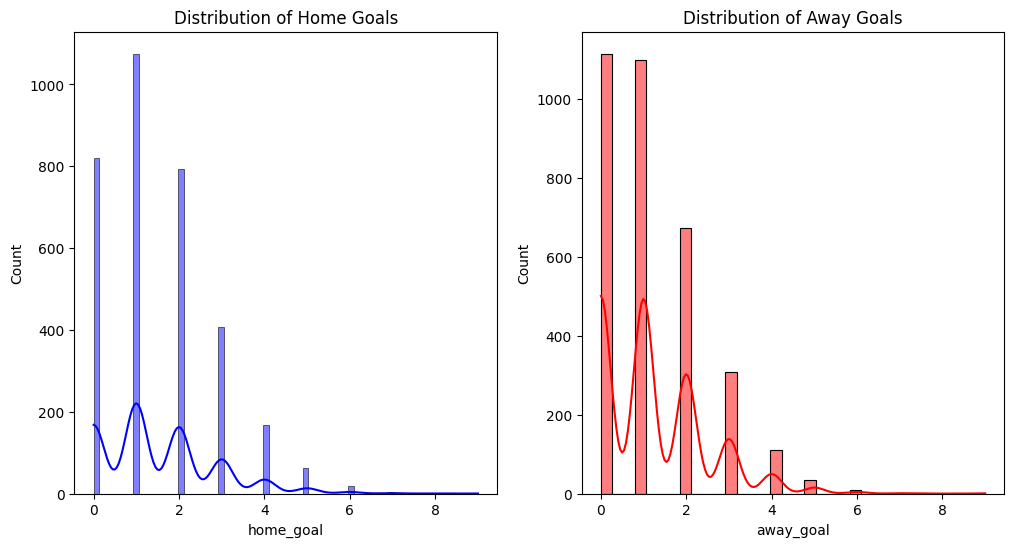

In [9]:
# Distribution of home_goal and away_goal
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
sns.histplot(data=df, x='home_goal', color = "blue", kde=True, ax=ax[0])
sns.histplot(data=df, x='away_goal', color  = "red", kde=True, ax=ax[1])
ax[0].set(title='Distribution of Home Goals')
ax[1].set(title='Distribution of Away Goals')
plt.show()

Distribusi ini menunjukan tim kandang lebih banyak dalam mencetak daripada tim tandang. Kedua distribusi condong ke jumlah gol yang lebih rendah, dengan sebagian besar pertandingan memiliki 0 hingga 2 gol untuk kedua tim. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


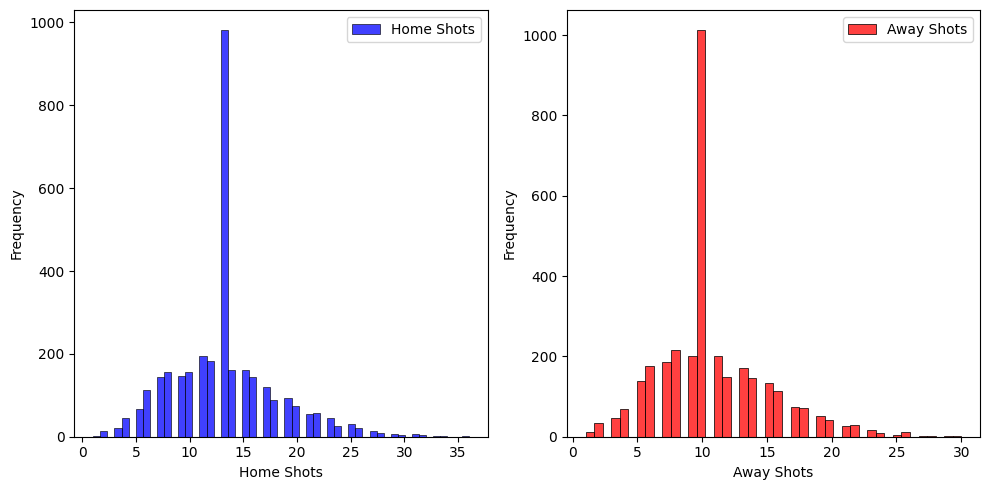

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and it has columns 'home_shots' and 'away_shots'

# Create the plot with distinguished colors
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['home_shots'], color="blue", ax=ax[0], label="Home Shots")  # Blue for home shots
ax[0].set_xlabel('Home Shots')
ax[0].set_ylabel('Frequency')

sns.histplot(df['away_shots'], color="red", ax=ax[1], label="Away Shots")  # Red for away shots
ax[1].set_xlabel('Away Shots')
ax[1].set_ylabel('Frequency')

# Add a legend to distinguish between home and away shots
ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

Kedua distribusi (baik untuk tim kandang maupun tim tandang) sangat mirip. Ini menunjukkan bahwa rata-rata jumlah tembakan yang dilakukan oleh tim kandang dan tim tandang dalam pertandingan hampir sama, dengan kisaran yang dominan antara 10 hingga 15 tembakan. Hal ini menunjukan keseimbangan dalam serangan baik tim kandang dan tim tandang

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


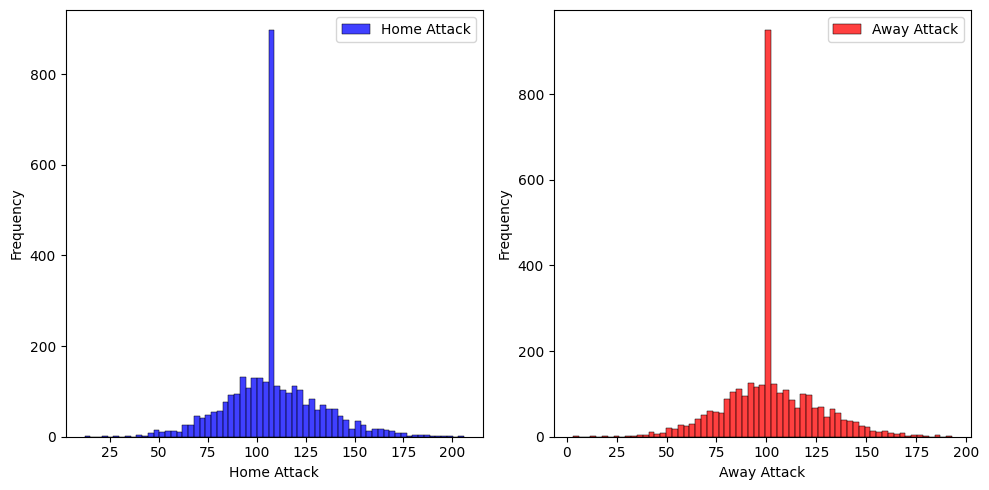

In [11]:
# Plotting the distribution of the home_attack and away_attack variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df['home_attack'], ax=ax[0], color = "blue", label = "Home Attack")
ax[0].set_xlabel('Home Attack')
ax[0].set_ylabel('Frequency')

sns.histplot(df['away_attack'], ax=ax[1], color = "red", label = "Away Attack")
ax[1].set_xlabel('Away Attack')
ax[1].set_ylabel('Frequency')

ax[0].legend()
ax[1].legend()

plt.tight_layout()
plt.show()

Baik tim kandang dan tim tandang memiliki pola serangan yang relatif konsisten dari satu pertandingan ke pertandingan lainnya. Dilihat dari persebarannya, tim kandang lebih banyak melakukan serangan daripada tim tandang.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


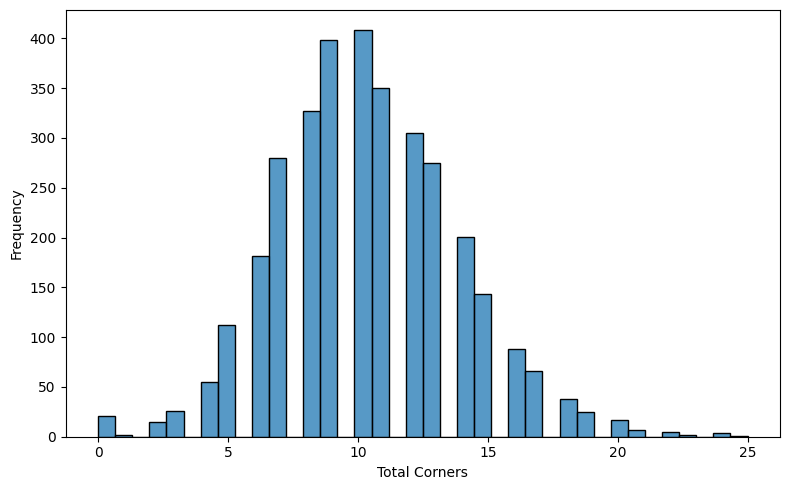

In [12]:
# Plotting the distribution of the total_corners variable
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(df['total_corners'], ax = ax)
plt.xlabel('Total Corners')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Sebagian besar pertandingan memiliki jumlah tendangan sudut yang relatif sama yakni 10

Akan dilakukan Bivariate Analysis

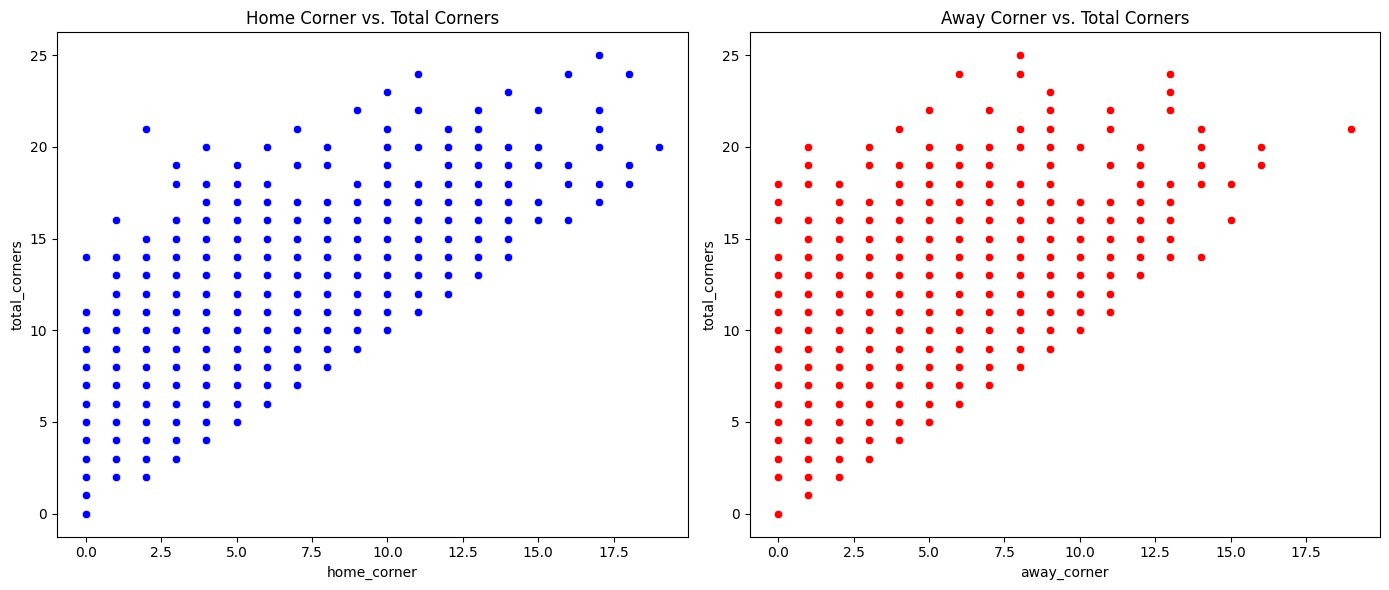

In [13]:
# Membuat dua scatter plots secara berdampingan
plt.figure(figsize=(14, 6))

# Plot pertama: Home corner vs. Total corners
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='home_corner', y='total_corners', color = "blue")
plt.title('Home Corner vs. Total Corners')

# Plot kedua: Away corner vs. Total corners
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='away_corner', y='total_corners', color = 'red')
plt.title('Away Corner vs. Total Corners')

# Tampilkan plot
plt.tight_layout()
plt.show()


Terlihat adanya hubungan postif yang kuat antara jumlah tendanga sudut tim kandang dan tim tandang dengan total tendangan sudut. Terlihat sebagian besar tim kandang mendominasi jumlah tendangan sudut dibandingkan tim tandang. Hal ini di dukung oleh sebaran serangan yang dilakukan oleh tim kandang

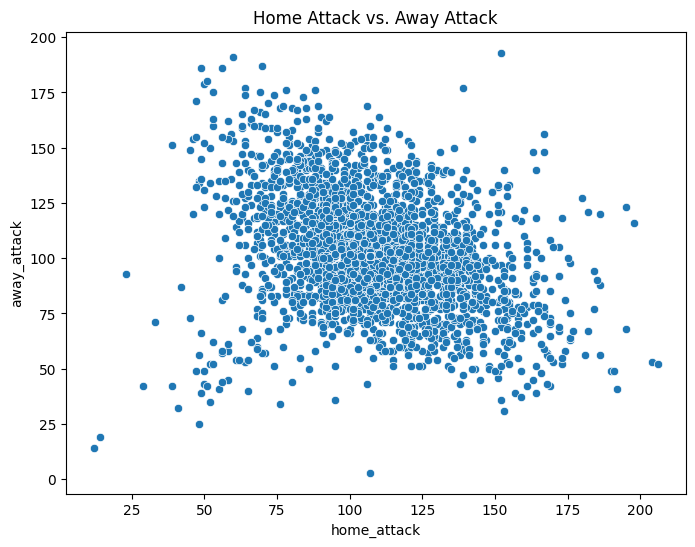

In [14]:
# Scatter plot of home_goal vs. away_goal
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='home_attack', y='away_attack')
plt.title('Home Attack vs. Away Attack')
plt.show()

Sebagian besar titik data berkumpul di tengah-tengah grafik, menunjukkan bahwa banyak pertandingan memiliki tingkat serangan yang seimbang antara tim tuan rumah dan tamu. Beberapa titik data berada jauh dari pusat, menunjukkan pertandingan dengan serangan yang sangat tinggi atau sangat rendah oleh salah satu tim.

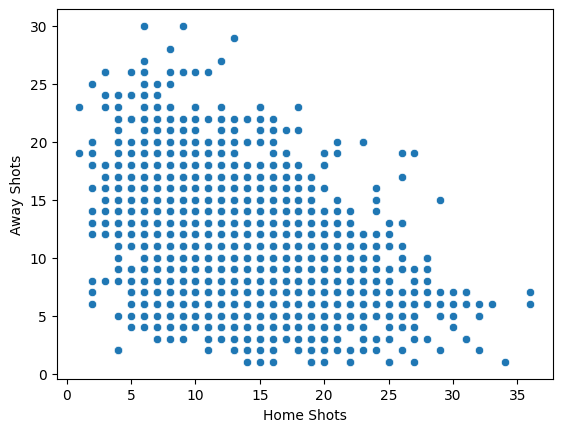

In [15]:
sns.scatterplot(data=df, x='home_shots', y='away_shots')
plt.xlabel('Home Shots')
plt.ylabel('Away Shots')
plt.show()

Sebagian besar distribusi tembakan berada di sisi kiri bawah yang menandakan mayoritas pertandingan memiliki jumlah tembakan yang relatif rendah. 

Terlihat ada korelasi negatif antara home shots dengan away shots. Jumlah tembakan tuan rumah meningkat, jumlah tembakan tamu menurun. Begitu sebaliknya

Terdapat beberapa pencilan terhadap beberapa pertandingan dimana jumlalh tembakan antara home dan away memiliki jumlah yang tinggi

**Feature Engineering dan Data Preparation**

Di Feature Engineering, akan membuat peubah baru berdasarkan peubah peubah yang sudah ada di dataset sehingga dapat mempersiapkan dataset yang sudah ditambah dengan peubah yang baru

Akan dilakukan penambahan peubah baru yakni rata-rata membobol dan rata-rata kebobolan untuk melihat seberapa kuat tim dalam mencetak gol dan pertahanan tim berdasarkan 10 pertandingan. Tim dengan rata-rata membobol yang tinggi, menunjukan seberapa produktif dalam mencetak gol dan tim dengan rata-rata kebobolan yang rendah, menunjukan seberapa baik pertahanan tim 

Membuat peubah baru rata-rata kebobolan baik untuk home & away team

In [16]:
# Set the window size for rolling average
window_size = 10


# Create a new column for rolling average goals conceded by home team
df['home_rolling_avg_conceded'] = df.groupby('home')['away_goal'].rolling(window_size).mean().reset_index(0, drop=True)

# Create a new column for rolling average goals conceded by away team
df['away_rolling_avg_conceded'] = df.groupby('away')['home_goal'].rolling(window_size).mean().reset_index(0, drop=True)

df['home_rolling_avg_conceded'] = df['home_rolling_avg_conceded'].fillna(0)
df['home_rolling_avg_conceded'] = df['home_rolling_avg_conceded'].fillna(0)

Membuat peubah baru rata-rata membobol baik untuk home & away team

In [17]:
# calculate rolling average goals for home and away teams
df['rolling_avg_goals_home'] = df.groupby('home')['home_goal'].rolling(window=10, min_periods=1).mean().reset_index(0, drop=True)
df['rolling_avg_goals_away'] = df.groupby('away')['away_goal'].rolling(window=10, min_periods=1).mean().reset_index(0, drop=True)

In [18]:
# Pertahanan tim (Defense)
df['home_attack'] = df['rolling_avg_goals_home']
df['away_attack'] = df['rolling_avg_goals_away']
df['home_defense'] = df['home_rolling_avg_conceded']
df['away_defense'] = df['away_rolling_avg_conceded']

In [19]:
# calculate the number of home and away wins for each team
home_wins = {}
away_wins = {}
for i, row in df.iterrows():
    home_team = row['home']
    away_team = row['away']
    if row['ht_diff'] > 0:
        home_wins[home_team] = home_wins.get(home_team, 0) + 1
    elif row['ht_diff'] < 0:
        away_wins[away_team] = away_wins.get(away_team, 0) + 1

# add the home and away win percentages to the dataframe
df['home_win_percent'] = df['home'].apply(lambda x: home_wins.get(x, 0) / (home_wins.get(x, 0) + away_wins.get(x, 0)) if (home_wins.get(x, 0) + away_wins.get(x, 0)) > 0 else 0)
df['away_win_percent'] = df['away'].apply(lambda x: away_wins.get(x, 0) / (home_wins.get(x, 0) + away_wins.get(x, 0)) if (home_wins.get(x, 0) + away_wins.get(x, 0)) > 0 else 0)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3352 entries, 0 to 3351
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tournament                 3352 non-null   object 
 1   home                       3352 non-null   object 
 2   home_goal                  3352 non-null   float64
 3   away_goal                  3352 non-null   float64
 4   away                       3352 non-null   object 
 5   home_corner                3352 non-null   float64
 6   away_corner                3352 non-null   float64
 7   home_attack                3352 non-null   float64
 8   away_attack                3352 non-null   float64
 9   home_shots                 3352 non-null   float64
 10  away_shots                 3352 non-null   float64
 11  time                       3352 non-null   object 
 12  date                       3352 non-null   object 
 13  ht_diff                    3352 non-null   float64
 1

Dilakukan normalisasi terhadap beberapa peubah dikarenakan mereka memiliki rentang nilai yang berbeda dan besar satu sama lain. Dilakukan normalisasi untuk memastikan perhitungan yang dilakukan model terhadap semua fitur diperlukan secara adil, sehingga tidak ada fitur yang mendominasi karena memiliki rentang nilai yang besar

In [21]:
df.head()

,tournament,home,home_goal,away_goal,away,home_corner,away_corner,home_attack,away_attack,home_shots,...,at_result,total_corners,home_rolling_avg_conceded,away_rolling_avg_conceded,rolling_avg_goals_home,rolling_avg_goals_away,home_defense,away_defense,home_win_percent,away_win_percent
0,Premier League,Arsenal,0.0,0.0,Chelsea,0.0,0.0,0.0,0.0,13.0,...,DRAW,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.607735,0.471910
1,Premier League,Leicester,0.0,0.0,Everton,0.0,0.0,0.0,0.0,13.0,...,DRAW,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.586466,0.376068
2,Premier League,Liverpool,0.0,0.0,Tottenham,0.0,0.0,0.0,0.0,13.0,...,DRAW,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.561576,0.403315
3,Premier League,Bournemouth,0.0,0.0,Leeds,0.0,0.0,0.0,0.0,13.0,...,DRAW,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.600000,0.515152
4,Premier League,Fulham,0.0,0.0,Man City,0.0,0.0,0.0,0.0,13.0,...,DRAW,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.615385,0.458515


In [22]:
from sklearn.preprocessing import StandardScaler

# Select the columns to normalize
columns_to_normalize = ['home_corner', 'away_corner', 'home_attack', 'away_attack', 'home_shots', 'away_shots']

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [23]:
unique_home_categories = df['home'].unique()
sorted(unique_home_categories)

['Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brentford',
 'Brighton',
 'Burnley',
 'Cardiff',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Huddersfield',
 'Hull',
 'Leeds',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man Utd',
 'Middlesbrough',
 'Newcastle',
 'Norwich',
 'Nottm Forest',
 'QPR',
 'Sheff Utd',
 'Southampton',
 'Stoke',
 'Sunderland',
 'Swansea',
 'Tottenham',
 'Watford',
 'West Brom',
 'West Ham',
 'Wolverhampton']

Terdapat 32 uniques di dalam dataset dalam peubah home

In [24]:
# Serangan tim (Attack)
df['home_attack'] = df['rolling_avg_goals_home']
df['away_attack'] = df['rolling_avg_goals_away']

# Pertahanan tim (Defense)
df['home_defense'] = df['home_rolling_avg_conceded']
df['away_defense'] = df['away_rolling_avg_conceded']

# Menggabungkan serangan dan pertahanan untuk clustering
df['team_attack'] = df['home_attack'] + df['away_attack']
df['team_defense'] = df['home_defense'] + df['away_defense']

**Implementasi Algoritma**

Algoritma yang dipakai untuk perbandingan ialah algoritma k-means. Sebelumnya, akan dilakukan pencarian clusters yang optimal menggunakan elbow method.

In [25]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.impute import SimpleImputer  # Pastikan untuk mengimpor SimpleImputer
import matplotlib.pyplot as plt

In [27]:
# Dataset X untuk clustering, hanya tim yang bermain di kandang
unique_home_categories = df['home'].unique()
home_category_data = df[df['home'].isin(unique_home_categories)]

# Dataset X untuk clustering
X = home_category_data[['team_defense', 'team_attack']]

# Mengatasi missing values (NaN) dengan imputasi menggunakan mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

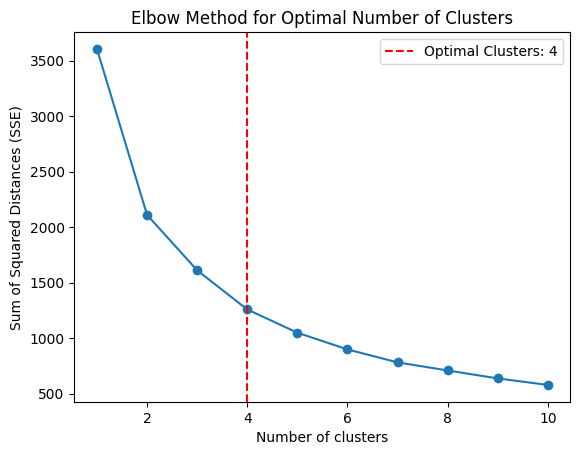

Jumlah cluster optimal: 4


In [28]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Elbow method untuk mencari jumlah cluster optimal
sse = []  # Sum of Squared Distances (SSE)
cluster_range = range(1, 11)  # Range dari 1 hingga 10 cluster
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_imputed)
    sse.append(kmeans.inertia_)

# Mendeteksi elbow menggunakan KneeLocator
kneedle = KneeLocator(cluster_range, sse, curve='convex', direction='decreasing')
optimal_clusters = kneedle.elbow

# Plot hasil Elbow Method
plt.plot(cluster_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')

# Tambahkan garis vertikal merah pada cluster optimal
plt.axvline(x=optimal_clusters, color='red', linestyle='--', label=f'Optimal Clusters: {optimal_clusters}')
plt.legend()
plt.show()

print(f"Jumlah cluster optimal: {optimal_clusters}")

Didapatkan cluster yang optimal adalah 4. Lalu, akan dimasukan cluster yang optimal tersebut ke dalam algoritma k-means

**Algoritma K-means**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/matplotlib/colors.py:1304: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/opt/conda/lib/python3.10/site-packages/matplotlib/colors.py:1311: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/opt/conda/lib/python3.10/site-packages/matplotlib/ticker.py:521: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


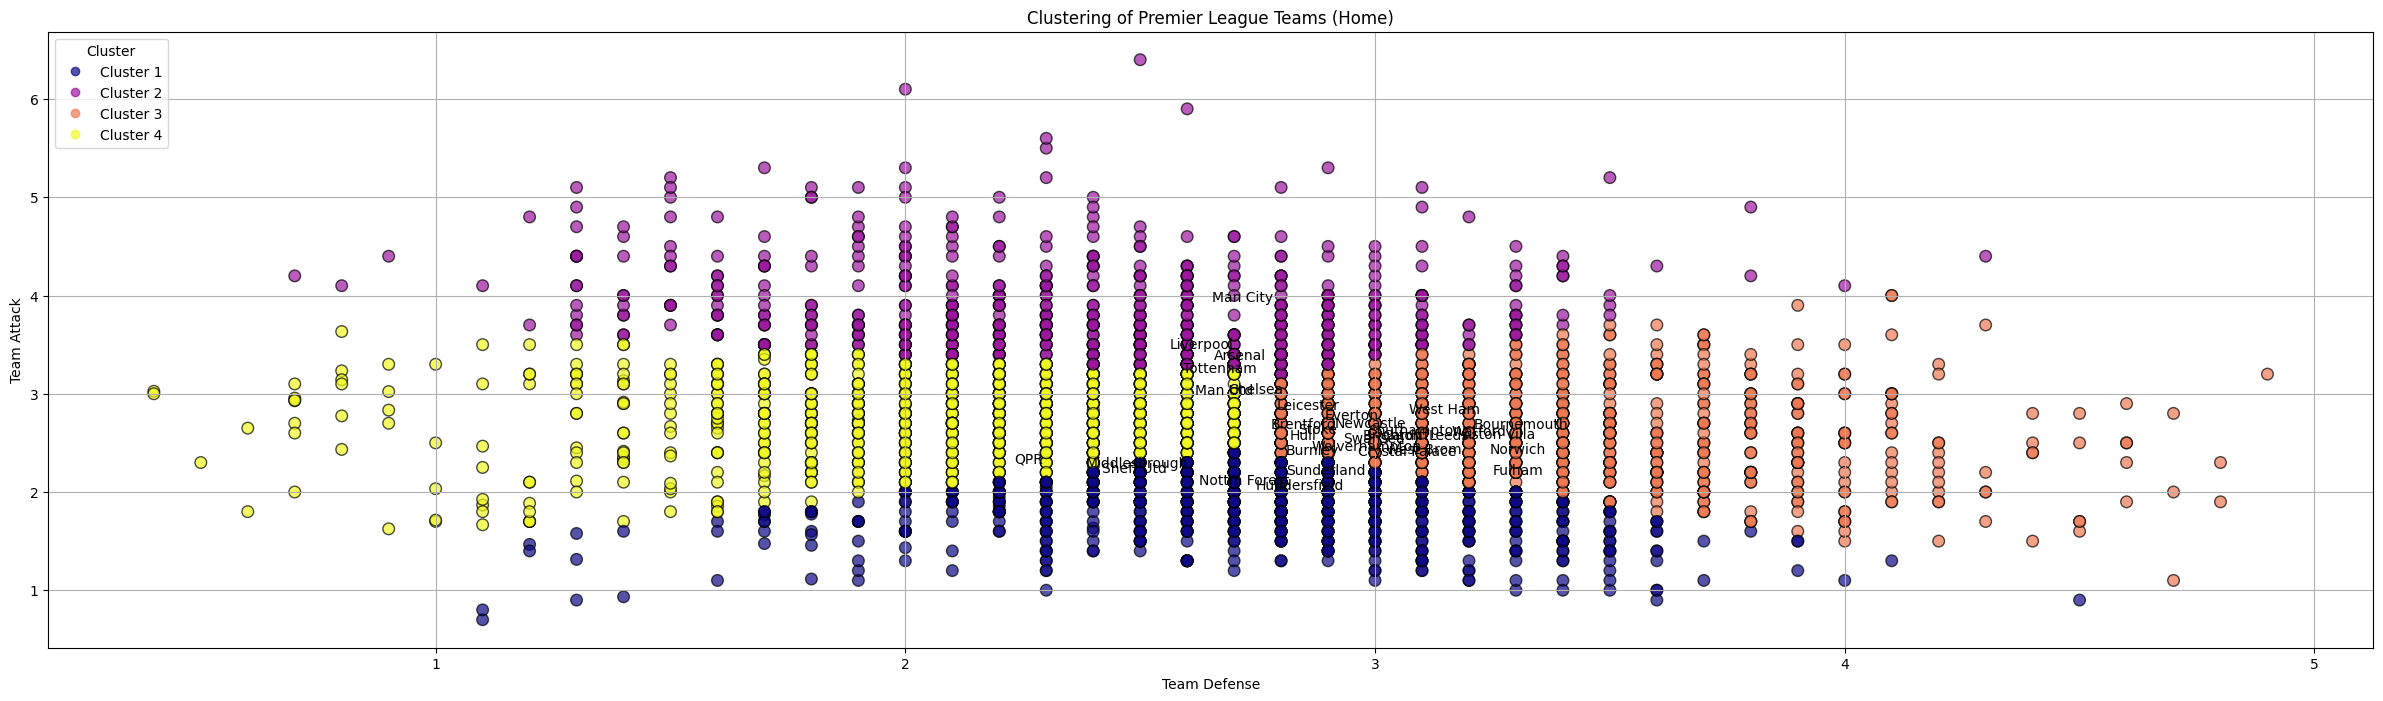

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'X_imputed' and 'optimal_clusters' are defined elsewhere

# Perform clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_imputed)

# Cluster colors (assuming 'cluster_colors' list exists)
cluster_colors = ['blue', 'green', 'red', 'purple', ...]  # Adjust the color list as needed

# Plot customizations
plt.figure(figsize=(30, 8))  # Increased figure size for better readability
scatter = plt.scatter(
    df['team_defense'],
    df['team_attack'],
    c=df['Cluster'],
    cmap='plasma',  # Using a contrasting colormap
    edgecolors='black',
    s=70,  # Increased marker size
    alpha=0.7,  # Reduced marker opacity for better label visibility
)

# Labels for unique clubs (assuming 'home' column contains club names)
unique_clubs = df['home'].unique()
for club in unique_clubs:
    club_data = df[df['home'] == club]
    x_mean = club_data['team_defense'].mean()
    y_mean = club_data['team_attack'].mean()
    plt.annotate(club, (x_mean + 0.2, y_mean + 0.1), fontsize=10)  # Adjusted offset for labels

# Create custom legend
legends = []
for i in range(optimal_clusters):
    legends.append(f"Cluster {i+1}")

plt.legend(scatter.legend_elements()[0], legends, loc='upper left', title='Cluster')
plt.xlabel('Team Defense')
plt.ylabel('Team Attack')
plt.title('Clustering of Premier League Teams (Home)')
plt.grid(True)
plt.show()

1. Defensif : Berwarna Biru, Tim-tim ini cenderung memiliki pertahanan yang sangat solid, tetapi serangan yang kurang efektif. Mereka mungkin lebih sering bermain bertahan dan mengandalkan serangan balik. Klub : Sunderland, Nottingham Forest, Sheffield, Middlesbrough
2. Attacking : Berwarna Ungu, Tim-tim ini memiliki serangan yang sangat kuat, tetapi pertahanan yang mungkin agak lemah. Mereka cenderung mendominasi pertandingan dan mencetak banyak gol. Klub : City, Liverpool, Arsenal, Tottenham
3. Balance : Berwarna kuning dan oranye, Tim-tim ini memiliki keseimbangan yang baik antara serangan dan pertahanan. Mereka mampu bermain menyerang dan bertahan dengan efektif.Klub : Leicester, West Ham, Bournemouth, Fulham, Norwich, Everton, Newcastle, Burnley, Swansea, Brentford, Wolverhampton, QPR.

**Evaluasi Model**

Dilakuakan evaluasi model menggunakan silhoutte score, davies bouldin score, dan calinski harabasz score. Silhoute score yaitu mengukur seberapa dekat antara sampel dalam 1 kluster dengan sampel di kluster lain. Lalu, davies bouldin score yaitu mengukur rata-rata rasio jarak antar kluster dengan ukuran kluster dan calinski harabasz yaitu  Mengukur rasio antara jarak antar - kluster dengan jarak dalam kluster
​
Index nilai nya yakni;
1. Silhoute score : -1 s/d 1. Semakin dekat ke 1, semakin baik klustering yang terpisah dan Semakin dekat -1, semakin buruk klustering
2.Davies-Bouldin : Nilai berkisar dari 0 ke atas. Semakin kecil nilainya, semakin baik hasil klustering.
3.Calinski-Harabasz : Tidak ada batas maksimum. Semakin tinggi nilainya, semakin baik hasil klustering

In [30]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

# Menghitung dan menyimpan hasil evaluasi K-Means
results = []

# Asumsikan df sudah berisi kolom 'Cluster' yang didapat dari K-Means
kmeans_labels = df['Cluster']  # Menggunakan label cluster dari df
all_subsets_filtered = X_imputed  # Data yang telah diimputasi

# Evaluasi K-Means
silhouette_kmeans = silhouette_score(all_subsets_filtered, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(all_subsets_filtered, kmeans_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(all_subsets_filtered, kmeans_labels)

# Tambahkan hasil evaluasi K-Means ke list
results.append({
    'Model': 'K-Means',
    'Silhouette Score': silhouette_kmeans,
    'Davies-Bouldin Score': davies_bouldin_kmeans,
    'Calinski-Harabasz Score': calinski_harabasz_kmeans
})

# Convert hasil evaluasi ke DataFrame untuk tampilan yang lebih baik
results_df = pd.DataFrame(results)

# Menampilkan hasil evaluasi
print(results_df)

     Model  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score
0  K-Means          0.325812              0.968524              2080.860212
